# Big Data Infrastructure Projekt

### GitHub: https://github.com/wi22b085/big-data

## Corona in Österreich: Impfungen und Infektionen

Im Zuge der Corona-Pandemie versuchte die österreichische Regierung durch ein robustes Test- und Impfprogramm die Situation zu verbessern und die Pandemie unter Kontrolle zu bringen.
Der womöglich entscheidenste Teil dieser Strategie war die Impfung und es wurde viel daran gesetzt, eine möglichst hohe Durchimpfungsrate zu erzielen. In vielen Ländern war die öffentliche Zulassung der verschienden Impfungen tatsächlich auch ein Wendepunkt in der Bewältigung der Pandemie. Weg von Lockdowns zu einem lockereren Umgang mit der Pandemie.

### Ziel

Ziel des Notebooks ist es, den Lauf der Impf - sowie Infektionszahlen über den Verlauf der Corona-Pandemie darzustellen. Eine ansprechende Aufbereitung von Daten kann vor allem in der Kommunikation verschiedener Strategien wichtig sein, um die Bevölkerung von den eigenen Vorhaben zu überzeugen oder wenn man lediglich über den derzeitigen Stand der Pandemie informieren möchte. Es soll auch geprüft werden, ob es vielleicht einen Zusammenhang zwischen Impfungen und Pandemieverlauf gibt und die Analyse der respektiven Daten soll auch Aufschluss über den Erfolg der Regierungsstrategien hinsichtlich Durchimpfungsraten bieten. 

Auch in der Bewältigung zukünftiger Pandemien kann eine klare Aufbereitung vorhergegangener Pandemie-Daten dabei helfen, bereits zu Beginn klare Strategien zu entwickeln und anhand historischer Daten zu entscheiden, welche Maßnahmen sinnvoller sind.

### Methodologie

Dieses Notebook versucht Impf- beziehungsweise Testdaten aus den Jahren 2021 bis Ende 2023 zu verarbeiten und für den User visuell ansprechend zu gestalten. Bei einem solch heiklen Thema muss man daher mit Vorsicht sowie Respekt vorgehen und sich daher auf zuverlässige Daten (von offiziellen Stellen/Ämtern) verlassen.

- Das beinhaltet eine Analyse von österreichischen Ämtern freigegebene Daten.
- Ein Vergleich zwischen den verschiedenen Datensätzen.

In diesem Jupiter-Notebook werden alle relevanten Schritte (sowie Erklärungen dazu) dokumentiert.

## Neo4J

Neo4J ist eine NoSQL-Graph-Database. Sie wurde aus folgenden Gründen für dieses Projekt gewählt:

- Flexibilität
- ACID-Transaktionen werden unterstützt
- Daten sind eng miteinander verbunden
- Einfache Darstellung der Daten

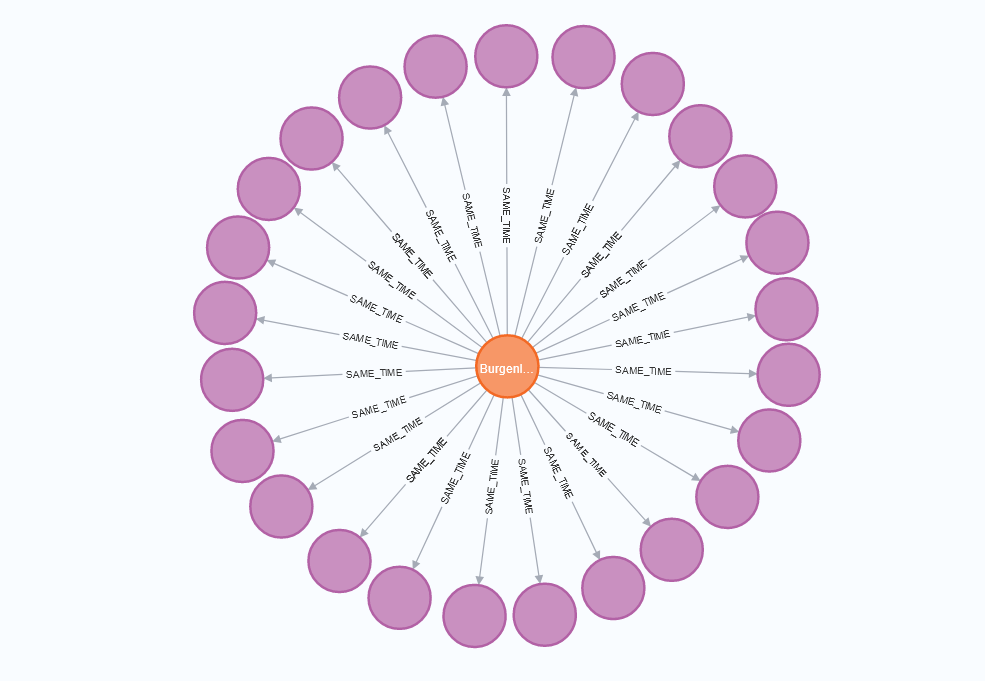

Die Testungen von Burgenland sind über Edges mit den Impfungen der Bezirke des gleichen Jahres verbunden.

## Projekt-Infrastruktur

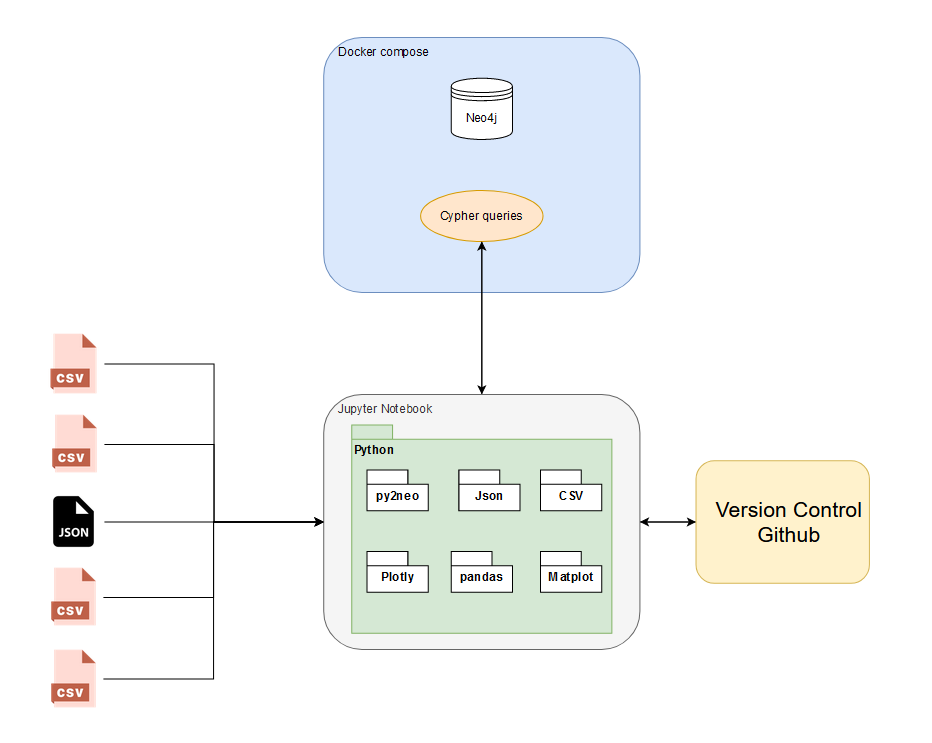

In diesem Big-Data-Projekt wird Docker zur Verwaltung der Neo4j-Datenbank verwendet. Für die Kommunikation mit der Datenbank werden Cypher-Abfragen ausgeführt. Die Verarbeitung der Daten erfolgt in einem Jupyter Notebook mit Python und verschiedenen Bibliotheken. GitHub dient als Versionskontrolle.

# Big Data Criteria

## 5 V's

### Volume:

- Fallen die Daten in großen Mengen an?

Es ist wichtig anzumerken, dass die Größe der Datenmenge relativ ist. Dennoch fallen in diesem Projekt eindeutig keine großen Datenmengen an. Daher ist dieser Punkt hier wenig Big-Data-relevant. Die Daten wurden zu Übungszwecken in der NoSQL-Graph-Database "Neo4J" gespeichert.

Alle genutzten Daten (4 CSV-Files) haben eine gemeinsame Größe von:
- ~ 13 000 Datensätzen
- ~ 900 KB

Implikationen: Die Datenmenge ist relativ gering und 900 KB für moderne Hardware trivial. Daher können auch komplexere Abfragen sehr schnell durchgeführt werden.

### Velocity:

- Fallen die Daten in einer großen Geschwindigkeit an?
- In welcher Geschwindigkeit werden die Daten verarbeitet?

Implikationen: Da in diesem Projekt keine neuen Daten anfallen und sie auch nur einmalig verarbeitet werden, ist Velocity hier wenig relevant.

Neo4J speichert die eigentlichen Daten auf der Festplatte. Jedoch lädt Neo4J Daten in den Arbeitsspeicher, um sie schneller verarbeiten zu können. In diesem Projekt wird nur Batch processing angewandt. Die Daten werden batchweise eingelesen, verarbeitet, in die Datenbank geladen und analysiert.

Lese-Zeit für ~ 900 KB:
- HDD: ~ 0,009 Sekunden bei 100 MB/s
- SSD: ~ 0,002 Sekunden bei 450 MB/s

Transfer-Zeit über Netzwertk für ~ 900 KB:
- ~ 0,009 Sekunden bei 100 MB/s

### Variety:

- Fallen die Daten in Großer Vielfalt an (Datentyp, Datenstruktur)?

Alle genutzten Daten dieses Projekts sind vom TYP CSV und strukturiert. Daher sind sie auch vollständig und folgen einem klaren Schema. Die Daten könnten daher auch in einer relationalen Datenbank mit Reihen und Spalten gespeichert werden.

Implikationen: Durch die gute Struktur der Daten sowie dem klaren Schema ist die Integration und Verarbeitung in einer Datenbank wie Neo4J erleichtert.

### Veracity:

- Sind die daten von hoher Qualität (Glaubwürdigkeit, Gültigkeit, Wahrhaftigkeit)?

Alle Daten dieses Projekts stammen aus glaubwürdigen Quellen:
- https://info.gesundheitsministerium.at/
- https://www.data.gv.at/

Implikationen: Die Datenqualität ist daher sehr hoch, was auch die Qualität der Analyseergebnisse maßgeblich positiv beeinflusst.

Zusätzlich wurden die Daten auf Unstimmigkeiten (Ausreißer, Widersprüche, Fehlende Werte) geprüft. Hierfür wurde manuell vorgegangen und Python-Funktionen der Pandas-Library genutzt. Zusätzlich wurden die Ergebnisse mit anderen Quellen verglichen. Ein weiterer guter Indikator ist, dass die Impfzahlen für einen Ort nie kleiner sind als aus einem vorherigen Jahr. Aus diesen Gründen kann davon ausgegangen werden, dass die Daten von hoher Qualität sind.

### Value:

Die Analyse von Test- und Impfdaten kann wertvolle Einblicke liefern, um die Wirksamkeit verschiedener Strategien zu prüfen. Konnten Impfkampagnen in bestimmten Bundesländern bzw. in Österreich insagesamt zur Bekämpfung der Pandemie beitragen? Gibt es Dinge, die man in ähnlichen Situationen in der Zukunft besser machen kann. 

Zudem bietet die Art der Darstellung die Möglichkeit, große Datensätze vereinfacht darzustellen und so einerseits der Bevölkerung besser und ansehnlicher zu Verfügung zu stellen. Andererseits erleichtern visuelle Darstellungen aber auch die Dateninterpretation und befähigen, das Entdecken von Trends oder Anomalien und unterstützen strategische Entscheidungen der Zukunft. Daher kann die Verarbeitung und Aufbereitung von Daten bezüglich Impfungen und Infektionen im Zuge einer Pandemie aus Big Data Sicht einen großen Vorteil bieten.

Die genutzten Daten haben einen großen Mehrwert. Durch ihre Analyse wird ein möglicher Zusammenhang zwischen den positiven Covid19-Testungen und den Impfungen festgestellt.

## 4 Levels of Data Processing

### Data Sources (Data Source Layer):

Für dieses Projekt sind keine Tools zur Datengewinnung notwendig. Die Daten wurden einmalig aus Quellen des Internets lokal abgespeichert.

Daten:
- Typ: Strukturiert
- Velocity und Volume: Die Daten fallen einamlig in geringer Menge an
- Externe Datenquelle: https://info.gesundheitsministerium.at/ und https://www.data.gv.at/
- Daten-Typ: CSV

### Data Messaging and Store Layer (Data Storage Layer):

Die Daten wurden über Docker in der NoSQL-Graph-Database "Neo4J" gespeichert. Noch vorher werden die Daten geringfügig transformie
rt (Sonderzeichen entfernt). Daher wird der ETL (Extract, Transform, Load)-Ansatz verfolgt.

CAP:
- Consistency: Neo4J bietet ACID-Transaktionen
- Availability: Noe4J bietet Mechanismen für teilweisen Systemausfall
- Partition Tolerance: Wenig relevant, da die Datenbank nur auf einem System ist

### Analysis Layer (Processing Layer):

Die Daten wurden mit verschiedenen Pandas Funktionen analysiert. Zudem wurde eine MapReduce-Calculation durchgeführt. Hiefür wurde ausschließlich Python genutzt.

### Consumption Layer (Data Output Layer):

Die Ergebnisse der Analyse und deren Value wurden mithilfe von Visualisierungen dargestellt. Hierzu wurden die Python-Libraries "Matplotlib" verwendet.

Folgende Diagrammtypen wurden eingesetzt:
- Barplots
- Histogramme
- Kreisdiagramme
- Streudiagramme
- Choroplethenkarten

Es wurden außerdem die Datenbank-Visualisierungen von Neo4J genutzt.

Zielgruppe der Visualisierungen:
- Fachkolleg*innen

In diesem Projekt wurden teilweise Ergebnisse zurück in das System gespeist. Beispielsweise wurden Ergebnisse der MapReduce-Calculation abgespeichert, damit sie in einem weiteren Schritt zusammengefügt und zur Erstellung eines Diagramms genutzt werden konnten.

# Data Source and Storage

Zuerst wird ein Docker Container erstellt. Dieser enthällt einen Container, ein neo4j Image, auf welches durch die Ports 7474 und 7687 zugegriffen.Der Service ist durch ein Benutzername/Passwort-Paar ('neo4j/aveQho9yf6tx29vgW3kv') geschützt, das über Umgebungsvariablen konfiguriert ist.Es wird auch ein Volume erstellt womit man die Daten nicht erneut einlesen muss:

Dieses File wird dann gestartet:

In [356]:
!docker-compose -p project_neo4j up -d

 Network project_neo4j_default  Creating
 Network project_neo4j_default  Created
 Volume "project_neo4j_neo4j-data"  Creating
 Volume "project_neo4j_neo4j-data"  Created
 Container neo4j-container  Creating
 Container neo4j-container  Created
 Container neo4j-container  Starting
 Container neo4j-container  Started


Um Neo4j zu verwenden, müssen Sie es und seinen Python-Treiber installieren. Darüber hinaus erleichtert die Installation der Bibliothek py2neo die Verbindungen und Interaktionen mit der Neo4j-Datenbank.

In [357]:
pip install neo4j


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [358]:
pip install py2neo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [359]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [360]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [361]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [362]:
pip install nbformat>=4.20

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Die folgende Python-Version wurde genutzt:

In [363]:
import sys
print(sys.version)

3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]


Um die restlichen Komponenten aufzulisten wurde die Library "pkg_resouces" genutzt:

In [364]:
import pkg_resources
for d in pkg_resources.working_set:
    print(d.project_name, d.version)

pywin32 306
pyzmq 25.1.2
ipython 8.22.2
jupyter-client 8.6.0
ipykernel 6.29.3
tornado 6.4
traitlets 5.14.1
psutil 5.9.8
jupyter-core 5.7.1
decorator 5.1.1
platformdirs 4.2.0
prompt-toolkit 3.0.43
pygments 2.17.2
asttokens 2.4.1
executing 2.0.1
debugpy 1.8.1
nest-asyncio 1.6.0
exceptiongroup 1.2.0
jedi 0.19.1
parso 0.8.3
stack-data 0.6.3
colorama 0.4.6
wcwidth 0.2.13
pure-eval 0.2.2
comm 0.2.1
matplotlib-inline 0.1.6
certifi 2024.2.2
jsonschema-specifications 2023.12.1
pytz 2022.7.1
youtube-dl 2021.12.17
py2neo 2021.2.4
interchange 2021.0.4
pansi 2020.7.3
setuptools 63.2.0
pip 23.3.2
attrs 23.2.0
packaging 23.0
Pillow 9.4.0
mysql-connector-python 8.3.0
tenacity 8.2.3
multidict 6.0.2
plotly 5.21.0
neo4j 5.19.0
nbformat 5.10.4
fonttools 4.38.0
jsonschema 4.21.1
typing-extensions 4.3.0
chardet 4.0.0
aiohttp 3.7.4.post0
matplotlib 3.7.0
charset-normalizer 3.3.2
idna 3.3
pyparsing 3.0.9
async-timeout 3.0.1
requests 2.31.0
pycparser 2.21
fastjsonschema 2.19.1
psycopg2 2.9.9
python-dateutil 2.

Pandas, CSV, Requests und verschiedene Modules von Py2Neo werden importiert:

In [365]:
from py2neo import Graph, Node, Relationship
import csv
import pandas as pd
import requests

Die benötigten CSV-Dateien werden mithilfe von pdf.read_csv eingelesen.
Ingesamt gibt es vier CSV-Dateien. Drei davon enthalten Informationen über die Impfungen für die Jahre 2021, 2022 und 2023. Die vierte Datei gibt Information über die Testungen pro Bundesland in den Jahren 2021 bis Ende 2022.  

In [366]:
faelle = pd.read_csv('timeline-faelle-bundeslaender.csv',delimiter=';')
vaccines_2021_cumulated = pd.read_csv('impfungen_2021.csv',delimiter=';')
vaccines_2022_cumulated = pd.read_csv('impfungen_2022.csv',delimiter=';')
vaccines_2023_cumulated = pd.read_csv('impfungen_2023.csv',delimiter=';')

Im folgenden ein paar allgemeine Informationen über Struktur und Inhalt der CSV-Dateien.

Alle genutzten CSV-Files verfügen über folgende Metadaten:
- Spaltenüberschriften
- Dateiformat
- Dateiname
- Dateigröße
- Erstellungsdatum
- Letzte Änderungsdatum
- Semikolons als Trennzeichen

In [367]:
faelle.head()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen,Faelle
0,2021,1,Burgenland,638575,155435,483140,17797
1,2021,2,Kärnten,675557,217933,457624,18828
2,2021,3,Niederösterreich,3400756,1141984,2258772,94781
3,2021,4,Oberösterreich,2162517,546777,1615740,60271
4,2021,5,Salzburg,823353,274598,548755,22947


In [368]:
faelle.tail()

,Datum,BundeslandID,Name,Testungen,TestungenPCR,TestungenAntigen,Faelle
6595,2022,6,Steiermark,22515339,6653515,15861824,627516
6596,2022,7,Tirol,10201158,4456324,5744834,284312
6597,2022,8,Vorarlberg,7295131,1652804,5642327,203320
6598,2022,9,Wien,73308019,65638829,7669190,2043138
6599,2022,10,Österreich,204039989,107516250,96523739,5686715


In [369]:
vaccines_2021_cumulated.head()

,Datum,Gemeindecode,Einwohner,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
0,2021,10101,14895,11666,78.321584,10961,73.588453
1,2021,10201,2000,1592,79.600000,1512,75.600000
2,2021,10301,1883,1506,79.978757,1444,76.686139
3,2021,10302,1841,1505,81.749049,1424,77.349267
4,2021,10303,2122,1672,78.793591,1591,74.976437


In [370]:
vaccines_2022_cumulated.head()

,date,municipality_id,municipality_name,municipality_population,dose_1,dose_2,dose_3,dose_4,dose_5+,vaccinated_according_to_recommendation,vaccinated_according_to_recommendation_percent
0,2022,10101,Eisenstadt,15485,12284,12037,9752,2169,18,9889,63.861802
1,2022,10201,Rust,2008,1644,1622,1356,261,4,1323,65.886454
2,2022,10301,Breitenbrunn am Neusiedler See,1922,1570,1552,1321,347,2,1340,69.719043
3,2022,10302,Donnerskirchen,1854,1552,1533,1298,281,0,1303,70.280475
4,2022,10303,Großhöflein,2099,1793,1759,1441,209,2,1465,69.795141


In [371]:
vaccines_2023_cumulated.head()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
0,2023,10101,Eisenstadt,15924,12095,11851,9740,3639
1,2023,10201,Rust,1978,1595,1572,1329,500
2,2023,10301,Breitenbrunn am Neusiedler See,1921,1517,1493,1285,569
3,2023,10302,Donnerskirchen,1857,1525,1505,1295,489
4,2023,10303,Großhöflein,2085,1739,1711,1411,433


In [372]:
vaccines_2021_cumulated.tail()

,Datum,Gemeindecode,Einwohner,Teilgeimpfte,TeilgeimpftePro100,Vollimmunisierte,VollimmunisiertePro100
2112,2021,91901,73861,55925,75.716549,52359,70.888561
2113,2021,92001,85264,57768,67.751923,53092,62.267780
2114,2021,92101,173916,126752,72.881161,116970,67.256607
2115,2021,92201,198806,149592,75.245214,138751,69.792159
2116,2021,92301,111812,84124,75.237005,78109,69.857439


In [373]:
vaccines_2022_cumulated.tail()

,date,municipality_id,municipality_name,municipality_population,dose_1,dose_2,dose_3,dose_4,dose_5+,vaccinated_according_to_recommendation,vaccinated_according_to_recommendation_percent
2110,2022,91901,Wien,75311,59229,57479,45842,11104,182,46412,61.627120
2111,2022,92001,Wien,84965,62179,59181,41511,7448,73,43494,51.190490
2112,2022,92101,Wien,181859,134331,129263,96569,18888,138,99984,54.978857
2113,2022,92201,Wien,208487,158431,153540,118550,21673,158,122136,58.582070
2114,2022,92301,Wien,116979,88831,85885,66592,14702,118,68510,58.566067


In [374]:
vaccines_2023_cumulated.tail()

,date,municipality_id,municipality_name,municipality_population,vaccination_1,vaccination_2,vaccination_3,vaccination_4+
2110,2023,91901,Wien 19. Döbling,75538,56636,54886,44430,17876
2111,2023,92001,Wien 20. Brigittenau,86663,59122,56133,39894,12837
2112,2023,92101,Wien 21. Floridsdorf,185847,133412,128129,96106,32764
2113,2023,92201,Wien 22. Donaustadt,219026,161785,156582,121503,40595
2114,2023,92301,Wien 23. Liesing,120393,88895,85791,66808,25195


In [375]:
faelle.shape

(6600, 7)

In [376]:
vaccines_2021_cumulated.shape

(2117, 7)

In [377]:
vaccines_2022_cumulated.shape

(2115, 11)

In [378]:
vaccines_2023_cumulated.shape

(2115, 8)

Wie unten ersichtlich, besteht der Datensatz aus einem Datum, welches aus dem jahr besteht, der BundeslandID, dem Namen des jeweiligen Bundesland sowie der Anzahl der durchgeführten Coronatests. Diese werden dann wieder aufgeteilt in PCR- und Antigentests.Zuletzt werden auch noch die positiven Fälle angezeigt.

In [379]:
faelle.columns.tolist()

['Datum',
 'BundeslandID',
 'Name',
 'Testungen',
 'TestungenPCR',
 'TestungenAntigen',
 'Faelle']

Der Impfungsdatensatz besteht, wie durch die Form ersichtlich ist, aus 8 Spalten. Diese beinhalten, wie oben erwähnt, das Datum mit Uhrzeit, die ID des Bezirks (diese sind nach der ersten Zahl auch dem jeweiligen Bundesland zuordenbar), den Namen des Bezirks, die Bevölkerung und dann die Anzahl der Personen, die die jeweilige Impfungsanzahl erhalten haben.

In [380]:
vaccines_2021_cumulated.columns.tolist()

['Datum',
 'Gemeindecode',
 'Einwohner',
 'Teilgeimpfte',
 'TeilgeimpftePro100',
 'Vollimmunisierte',
 'VollimmunisiertePro100']

Der Impfungsdatensatz 2022 umfasst verschiedene Informationen zu den Impfungen in den Gemeinden. Jeder Datensatz enthält das Datum, zu dem die Daten erfasst wurden.Eine eindeutige Kennung für jede Gemeinde, die es ermöglicht, sie zu identifizieren. Der Name der Gemeinde, in der die Impfungen durchgeführt wurden. Die Gesamtzahl der Einwohner in der jeweiligen Gemeinde. Es werden fünf Spalten (Dose 1 bis Dose 5+) angegeben, um die Anzahl der Personen zu verfolgen, die eine bestimmte Impfdosis erhalten haben. Die Gesamtanzahl der Personen, die gemäß den Empfehlungen vollständig geimpft wurden. Der Prozentsatz der Bevölkerung, der gemäß den Empfehlungen vollständig geimpft wurde."

In [381]:
vaccines_2022_cumulated.columns.tolist()

['date',
 'municipality_id',
 'municipality_name',
 'municipality_population',
 'dose_1',
 'dose_2',
 'dose_3',
 'dose_4',
 'dose_5+',
 'vaccinated_according_to_recommendation',
 'vaccinated_according_to_recommendation_percent']

Der Impfungsdatensatz 2023 besteht, wie durch die Form ersichtlich ist, aus 8 Spalten. Diese beinhalten, wie oben erwähnt, das Datum als jahr dargestellt, die ID der Gemeinde (diese sind nach der ersten Zahl auch dem jeweiligen Bundesland zuordenbar), den Namen des Gemeinde, die Bevölkerung und dann die Anzahl der Personen, die die jeweilige Impfungsanzahl erhalten haben.

In [382]:
vaccines_2023_cumulated.columns.tolist()

['date',
 'municipality_id',
 'municipality_name',
 'municipality_population',
 'vaccination_1',
 'vaccination_2',
 'vaccination_3',
 'vaccination_4+']

Es wird noch überprüft, ob einige Datensätze unvollständig sind oder fehlende Werte aufweisen.

In [383]:
faelle.isnull().sum()

Datum               0
BundeslandID        0
Name                0
Testungen           0
TestungenPCR        0
TestungenAntigen    0
Faelle              0
dtype: int64

In [384]:
vaccines_2021_cumulated.isnull().sum()

Datum                     0
Gemeindecode              0
Einwohner                 0
Teilgeimpfte              0
TeilgeimpftePro100        0
Vollimmunisierte          0
VollimmunisiertePro100    0
dtype: int64

In [385]:
vaccines_2022_cumulated.isnull().sum()

date                                              0
municipality_id                                   0
municipality_name                                 0
municipality_population                           0
dose_1                                            0
dose_2                                            0
dose_3                                            0
dose_4                                            0
dose_5+                                           0
vaccinated_according_to_recommendation            0
vaccinated_according_to_recommendation_percent    0
dtype: int64

In [386]:
vaccines_2023_cumulated.isnull().sum()

date                       0
municipality_id            0
municipality_name          0
municipality_population    0
vaccination_1              0
vaccination_2              0
vaccination_3              0
vaccination_4+             0
dtype: int64

In diesem Fall sind alle Datensätze vollständig. 

Abschließend werden noch die allgemeinen Eigenschaften des Datensatzes angezeigt:

In [387]:
faelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Datum             6600 non-null   int64 
 1   BundeslandID      6600 non-null   int64 
 2   Name              6600 non-null   object
 3   Testungen         6600 non-null   int64 
 4   TestungenPCR      6600 non-null   int64 
 5   TestungenAntigen  6600 non-null   int64 
 6   Faelle            6600 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 361.1+ KB


* Es ist ein DataFrame.
* Es gibt 6600 Einträge, d.h. 6600 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 6599.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 6600 Werte sind non-null).
* Die Spalte Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~361.1 kb

In [388]:
vaccines_2021_cumulated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datum                   2117 non-null   int64  
 1   Gemeindecode            2117 non-null   int64  
 2   Einwohner               2117 non-null   int64  
 3   Teilgeimpfte            2117 non-null   int64  
 4   TeilgeimpftePro100      2117 non-null   float64
 5   Vollimmunisierte        2117 non-null   int64  
 6   VollimmunisiertePro100  2117 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 115.9 KB


* Es ist ein DataFrame.
* Es gibt 2117  Einträge, d.h. 2117  Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 2116.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 2117 Werte sind non-null).
* Die Spalten der TeilgeimpftePro100 sowie auch die VollimmunisiertePro100 bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~115.9 kb

In [389]:
vaccines_2022_cumulated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   date                                            2115 non-null   int64  
 1   municipality_id                                 2115 non-null   int64  
 2   municipality_name                               2115 non-null   object 
 3   municipality_population                         2115 non-null   int64  
 4   dose_1                                          2115 non-null   int64  
 5   dose_2                                          2115 non-null   int64  
 6   dose_3                                          2115 non-null   int64  
 7   dose_4                                          2115 non-null   int64  
 8   dose_5+                                         2115 non-null   int64  
 9   vaccinated_according_to_recommendation   

* Es ist ein DataFrame.
* Es gibt 2115 Einträge, d.h. 2115 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als Index) mit Werten von 0 bis 2114.
* Die Tabelle hat 11 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 2115 Werte sind non-null).
* Die Spaltennamen bestehen aus Textdaten (Strings, auch bekannt als Objekte). Die anderen Spalten sind numerische Daten, von denen fast alle ganze Zahlen (aka Integer) sind. Die Spalte 'vaccinated_according_to_recommendation_percent' wird als Float (Dezimalzahl) angegeben.
* Die Art der Daten (Zeichen, Ganzzahlen, ...) in den verschiedenen Spalten wird durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in diesem Fall ~181.9 KB.

In [390]:
vaccines_2023_cumulated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     2115 non-null   int64 
 1   municipality_id          2115 non-null   int64 
 2   municipality_name        2115 non-null   object
 3   municipality_population  2115 non-null   int64 
 4   vaccination_1            2115 non-null   int64 
 5   vaccination_2            2115 non-null   int64 
 6   vaccination_3            2115 non-null   int64 
 7   vaccination_4+           2115 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 132.3+ KB


* Es ist ein DataFrame.
* Es gibt 2115 Einträge, d.h. 2115 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 2114.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 2115 Werte sind non-null).
* Die Spalte Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~132.3 kb

Um eine Verbindung zur Datenbank herzustellen, muss eine URL eingeben, über die die Verbindung hergestellt wird, sowie Authentifizierungsdaten, bestehend aus Benutzername und Passwort. Mit py2neo kann dann die Verbindung mithilfe von Graph hergestellt werden. Dies ist auch mit GraphDatabase von Neo4J möglich.

In [391]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"
password = "aveQho9yf6tx29vgW3kv"

graph = Graph(uri, auth=(username, password))
driver=GraphDatabase.driver(uri, auth=(username, password))


Um zu überprüfen, ob die Seite aktiv ist, kann diese Funktion verwendet werden:

In [393]:
url = "http://localhost:7474/browser/"
response = requests.get(url)

if response.status_code == 200:
    print("Website is accessible.")
else:
    print("Failed to access website.")



Website is accessible.


Im Folgenden werden die vier CSV-Dateien in die Datenbank eingespeichert.

Die Impfungen werden als Integer eingespeichert. Dadurch, dass in einigen Feldern Sonderzeichen enthalten sind, werden diese mit der Funktion stripped_row entfernt und der Datensatz korrekt übertragen.

In [394]:
# mit csvreader werden die Daten eingelesen
with open('impfungen_2021.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Für jede Zeile wird eine Node in der Datenbank erstellt
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['Datum'],
                                    bezirkId=row['Gemeindecode'],
                                    population=row['Einwohner'],
                                    ersteImpfung=int(stripped_row['Teilgeimpfte']),
                                    zweiteImpfung=int(stripped_row['Vollimmunisierte']))
            
            # Dann werden die Nodes zum Graphen hinzugefügt
            graph.create(impfPatient_node)

In [395]:
# mit csvreader werden die Daten eingelesen
with open('impfungen_2022.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Für jede Zeile wird eine Node in der Datenbank erstellt
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['dose_1']),
                                    zweiteImpfung=int(stripped_row['dose_2']),
                                    dritteImpfung=int(stripped_row['dose_3']),
                                    vierteImpfung=int(stripped_row['dose_4']),
                                    mehrAlsVier=int(stripped_row['dose_5+']))
            
            # Dann werden die Nodes zum Graphen hinzugefügt
            graph.create(impfPatient_node)

In [396]:
# mit csvreader werden die Daten eingelesen
with open('impfungen_2023.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Für jede Zeile wird eine Node in der Datenbank erstellt
            impfPatient_node = Node("Impf_Patient",
                                    datum=row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['vaccination_1']),
                                    zweiteImpfung=int(stripped_row['vaccination_2']),
                                    dritteImpfung=int(stripped_row['vaccination_3']),
                                    mehrAls3=int(stripped_row['vaccination_4+']))
            
            # Dann werden die Nodes zum Graphen hinzugefügt
            graph.create(impfPatient_node)

Für einen ersten Überblick über die Anzahl an Impfungen:

In [397]:
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, sum(i.ersteImpfung) AS Vaccinations
"""

result = graph.run(cypher_query)

# Fetch all records
records = result.data()

# Print the result
for record in records:
    print(record)

{'Year': '2021', 'Vaccinations': 6395972}
{'Year': '2022', 'Vaccinations': 6725548}
{'Year': '2023', 'Vaccinations': 6531622}


Die Fälle werden ebenfalls mithilfe von stripped_row in die Datenbank eingespeichert, um falsche Zeichen zu vermeiden. Hier werden die Tests und auch die positiven Fälle als Integer dargestellt.

In [398]:
# mit csvreader werden die Daten eingelesen
with open('timeline-faelle-bundeslaender.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            tests_value = stripped_row['Testungen']
            tests_value = int(tests_value) if tests_value.isdigit() else None
            # Für jede Zeile wird eine Node in der Datenbank erstellt
            tests_node = Node("Tests",
                                datum=stripped_row['Datum'],
                                BundeslandID=row['BundeslandID'],
                                BundeslandName=row['Name'],
                                Tests=int(tests_value),
                                PCR=row['TestungenPCR'],
                                Antigen=row['TestungenAntigen'],
                                fällePositiv = int(stripped_row['Faelle'])
                               )
            
            # Dann werden die Nodes zum Graphen hinzugefügt
            graph.create(tests_node)

Zuletzt wurden dann noch die Kanten zwischen den Knoten erstellt. In diesem Fall wurden die Tests mit den Impfungen verbunden.

In [399]:
def create_relationships_with_limit(graph, node1_label, node2_label, relationship_type, limit):
    # Query that matches nodes, creates a limited number of relationships, and ensures no duplicate relationships
    query = f"""
    MATCH (n1:{node1_label}), (n2:{node2_label})
    WHERE n1.datum = n2.datum AND NOT EXISTS((n1)-[:{relationship_type}]->(n2))
    WITH n1, n2 LIMIT {limit}
    CREATE (n1)-[r:{relationship_type}]->(n2)
    RETURN count(r) as created_count
    """
    # Running the query
    result = graph.run(query).single().value()
    print(f"{result} relationships created")
    return result

In [400]:
query = f"""

MATCH (t:Tests), (i:Impf_Patient)
WHERE t.datum = i.datum
WITH t, i LIMIT 100000 
CREATE (t)-[r:SAME_TIME]->(i)
RETURN count(r)
"""
graph.run(query)

count(r)
100000


In [401]:
query = f""" MATCH (t:Tests)-[r:SAME_TIME]->(i:Impf_Patient)
RETURN t, r, i LIMIT 25
"""
graph.run(query)

t,r,i
"(_6382:Tests {Antigen: '1389673', BundeslandID: '6', BundeslandName: 'Steiermark', PCR: '509514', Tests: 1899187, datum: '2021', fällePositiv: 52931})",(_6382)-[:SAME_TIME {}]->(_0),"(_0:Impf_Patient {bezirkId: '10101', datum: '2021', ersteImpfung: 11666, population: '14895', zweiteImpfung: 10961})"
"(_6376:Tests {Antigen: '10095398', BundeslandID: '10', BundeslandName: '\u00c3\u2013sterreich', PCR: '5507472', Tests: 15602870, datum: '2021', fällePositiv: 434861})",(_6376)-[:SAME_TIME {}]->(_0),"(_0:Impf_Patient {bezirkId: '10101', datum: '2021', ersteImpfung: 11666, population: '14895', zweiteImpfung: 10961})"
"(_6356:Tests {Antigen: '9607679', BundeslandID: '10', BundeslandName: '\u00c3\u2013sterreich', PCR: '5395666', Tests: 15003345, datum: '2021', fällePositiv: 418152})",(_6356)-[:SAME_TIME {}]->(_0),"(_0:Impf_Patient {bezirkId: '10101', datum: '2021', ersteImpfung: 11666, population: '14895', zweiteImpfung: 10961})"


# Visualizations

Visualizations als Teil des Data-Output-Layers spielen eine wichtige Rolle in der Darstellung von großen Datenmengen. Sie ermöglichen, dass auch komplexe Zusammenhänge leicht verständlich und zugänglich gemacht werden. Das ist insbesondere wichtig, wenn heikle Themen wie eine Pandemie und dazugehörige Daten wie Infektionszahlen oder Impfquoten der Bevölkerung kommuniziert werden sollen.

Um darzustellen, wie viele Tests insgesamt durchgeführt wurden, werden diese zunächst nach Bundesland dargestellt. Der Datensatz enthält ebenfalls die Gesamtzahlen aus ganz Österreich. Daher müssen diese Werte noch herausgefiltert werden. Wie oben bereits erwähnt, sind bestimmte Sonderzeichen im Datensatz vorhanden, daher muss auch Ã–sterreich aussortiert werden.

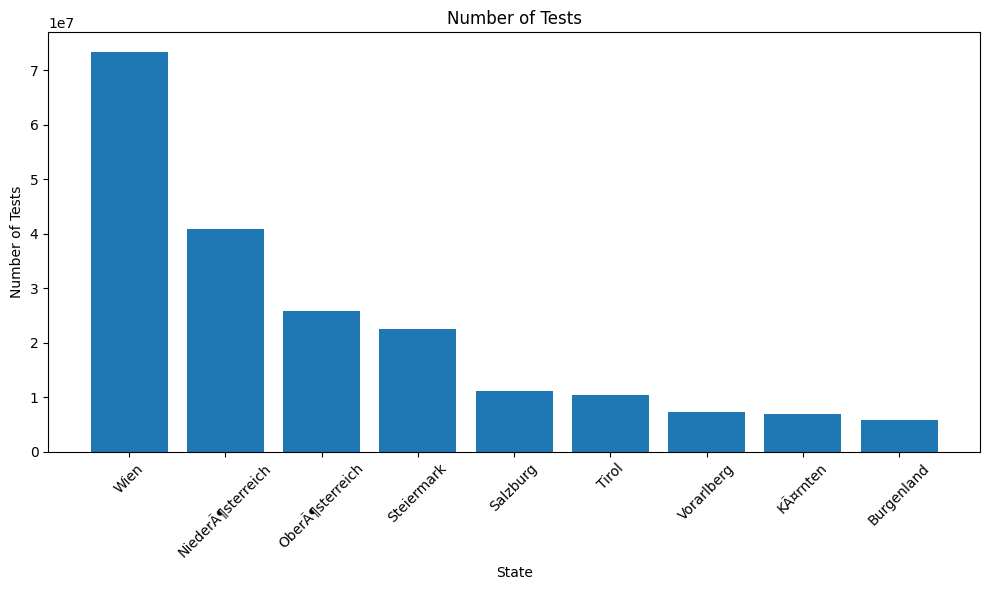

In [402]:
import matplotlib.pyplot as plt
import pandas as pd
from neo4j import GraphDatabase
import numpy as np  

#Cypher query ausfuehren um die tests pro Bundesland zu erhalten
result = graph.run("""
MATCH (t:Tests) 
where t.BundeslandName <> 'Österreich'AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, t.Tests
ORDER BY t.Tests DESC
""")

#zu einem Dataframen umwandeln
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# fehlende Werte ersetzten mit 0 oder nan
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.Tests'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Chart erstellen
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.Tests'])
plt.xlabel('State')
plt.ylabel('Number of Tests')
plt.title('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Wien hat fast doppelt so viele Tests gemacht wie Niederösterreich.
* Wien und Niederösterreich zusammen haben mehr Tests gemacht als der Rest zusammen.

Aber wie viele der allgemeinen Tests waren eigentlich positiv? Die hier dargestellten Werte sind nach Bundesland aufgeschlüsselt, um die Verteilung zu zeigen.

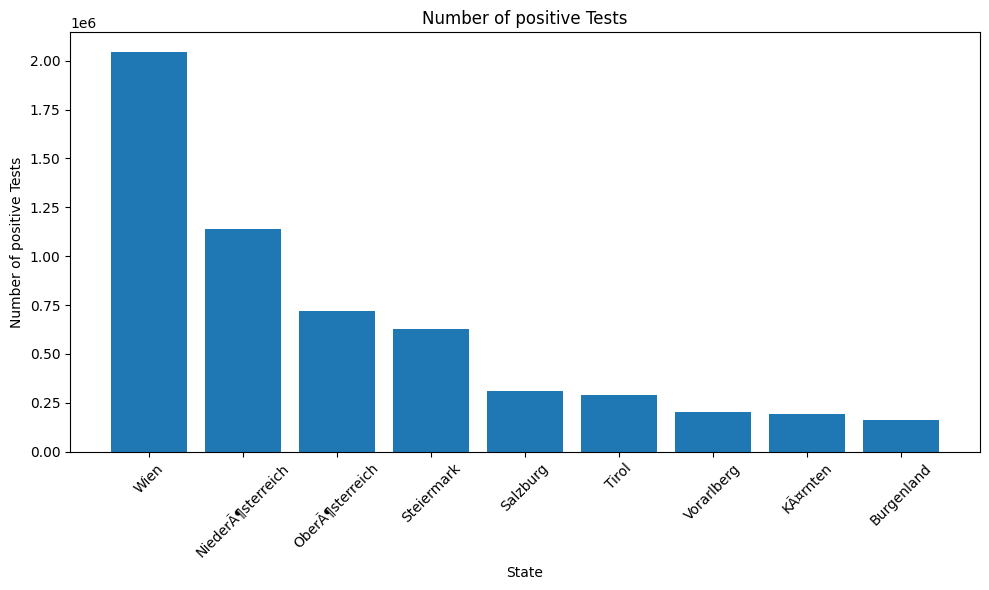

In [403]:
# Run Cypher query
result = graph.run("""
MATCH (t:Tests) 
where t.BundeslandName <> 'Österreich'AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, t.fällePositiv
ORDER BY t.fällePositiv DESC
""")

#zu einem Dataframen umwandeln
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# fehlende Werte ersetzten mit 0 oder nan
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.fällePositiv'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Chart erstellen
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.fällePositiv'])
plt.xlabel('State')
plt.ylabel('Number of positive Tests')
plt.title('Number of positive Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Wien hat fast doppelt so viele Tests gemacht wie Niederösterreich.
* Wien und Niederösterreich zusammen haben mehr Tests gemacht als der Rest zusammen.
* Aufgrund der großen Stichprobengröße sind die Graphen fast identisch.

Wie sehen die positiven Fälle im Vergleich zu den Impfungen aus? Corona wurde in allen Medien thematisiert und die genauen Zahlen wurden stets veröffentlicht. Aber wie verhält sich die Anzahl der Infektionen im Vergleich zu den Impfungen?

Im folgenden werden dann immer die positiven Fälle als Maßstab verwendet:

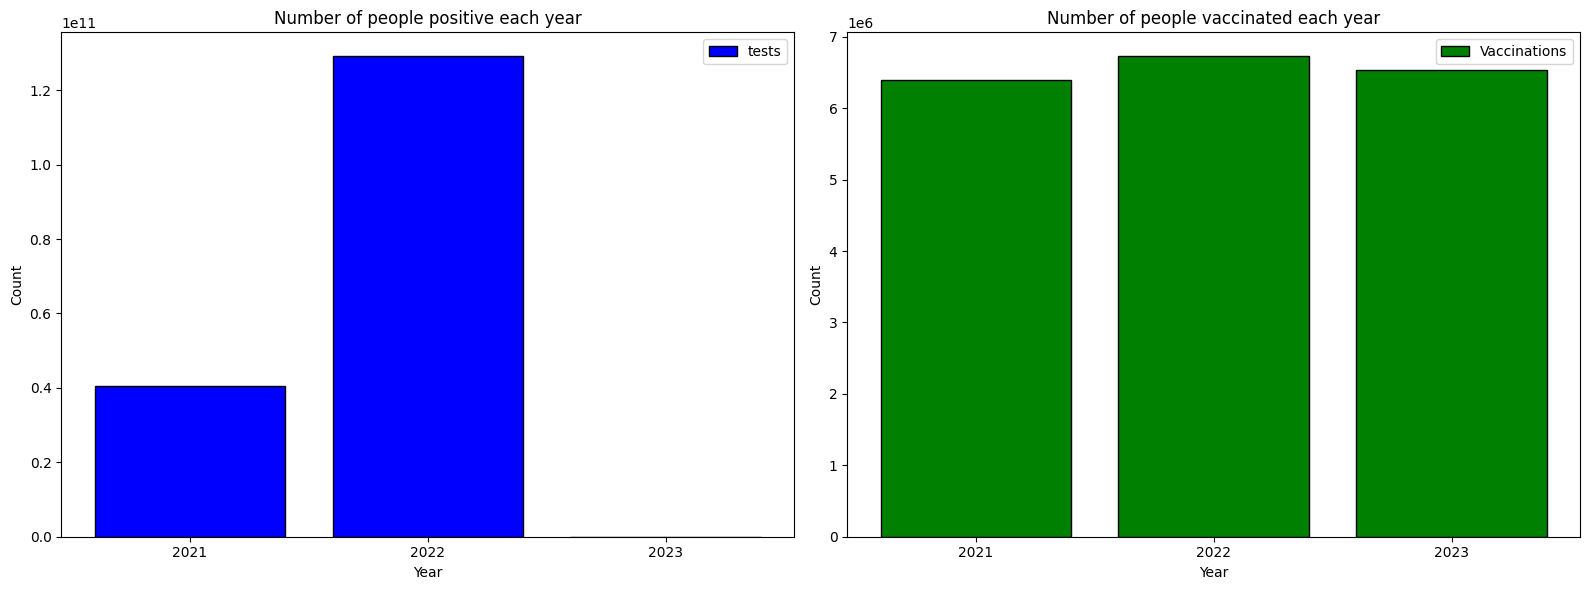

In [404]:

cypher_query = """
MATCH (n)
RETURN n.datum AS Year, sum(n.Tests) AS tests, sum(n.ersteImpfung) AS Vaccinations
ORDER BY Year
"""

with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Diagram for Tests
ax1.bar(df['Year'], df['tests'], color='b', edgecolor='black', label='tests')
ax1.set_xlabel("Year")
ax1.set_ylabel("Count")
ax1.set_title("Number of people positive each year")
ax1.set_xticks(df['Year'])
ax1.legend()

# Diagram for Vaccinations
ax2.bar(df['Year'], df['Vaccinations'], color='g', edgecolor='black', label='Vaccinations')
ax2.set_xlabel("Year")
ax2.set_ylabel("Count")
ax2.set_title("Number of people vaccinated each year")
ax2.set_xticks(df['Year'])
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

Erstaunlicherweise sind die Infektionen in beiden im Datensatz enthaltenen Jahren geringer als die Impfungen. Dies ist einerseits auf die Lockdowns zurückzuführen. Dies legt nahe, dass die Impfkampagnen eine entscheidende Rolle dabei gespielt haben könnten, die Ausbreitung des Virus einzudämmen und die Anzahl der Neuinfektionen zu verringern.

Wie viele der allgemeinen Tests waren eigentlich positiv in jedem Bundesland und wie hoch ist ihr prozentualer Anteil? Die hier dargestellten Werte sind nach Bundesland aufgeschlüsselt, um die Verteilung zu zeigen.

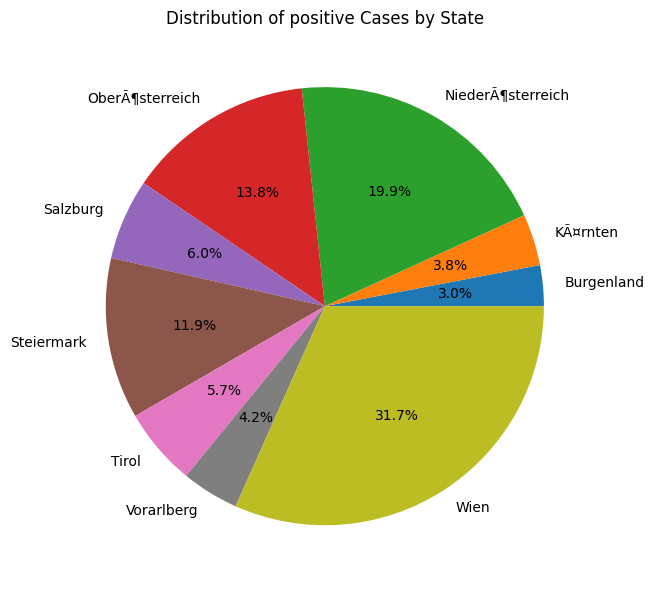

In [405]:
cypher_query = """
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, sum(t.fällePositiv) as Cases
"""

result = graph.run(cypher_query)

#zu einem Dataframen umwandeln
df = pd.DataFrame([dict(r) for r in result], columns=['t.BundeslandName', 'Cases'])

# leere werte ersetzten mit 0
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['Cases'].replace({None: 0}, inplace=True)

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['Cases'], labels=df['t.BundeslandName'], autopct='%1.1f%%')
plt.title('Distribution of positive Cases by State')
plt.tight_layout()
plt.show()



* Wien hat fast doppelt so viele Tests gemacht wie Niederösterreich.
* Wien und Niederösterreich zusammen hatten mehr positive Fälle als alle anderen Bundesländer zusammen.
* Wien allein hatte mehr als ein Viertel der positiven Fälle.
* Vorarlberg, Tirol, Burgenland und Salzburg hatten zusammen knapp 20 % der positiven Fälle.

In [406]:
print(df.columns)

Index(['t.BundeslandName', 'Cases'], dtype='object')


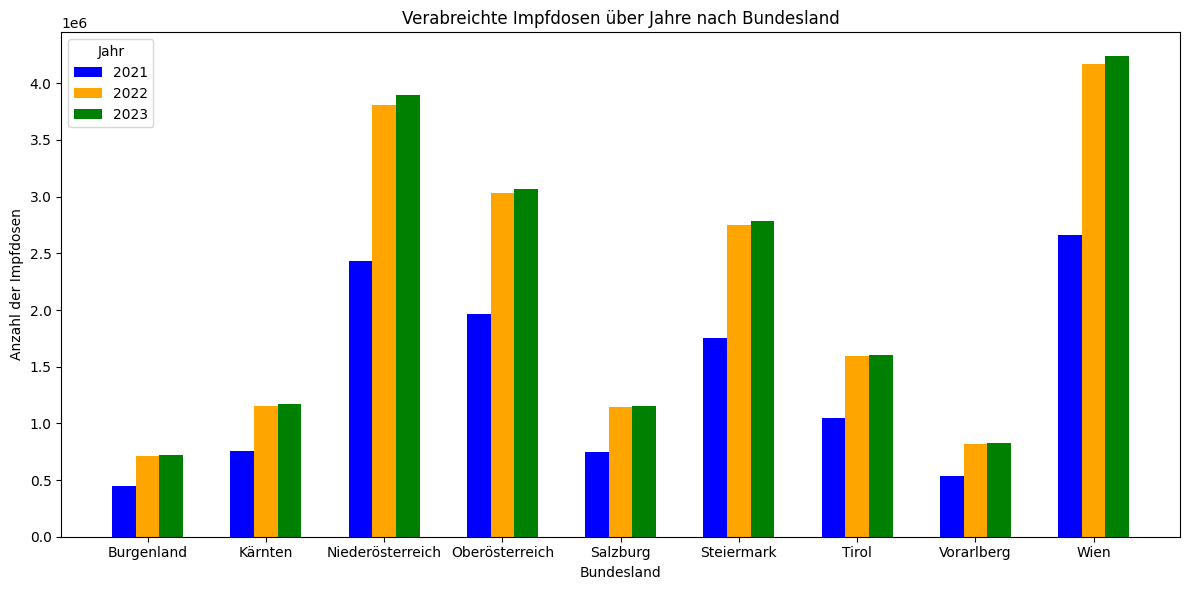

In [407]:
# Cypher query:

cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, i.bezirkId AS opt,
       CASE WHEN i.datum CONTAINS '2021' THEN i.ersteImpfung + i.zweiteImpfung
            WHEN i.datum CONTAINS '2022' THEN i.ersteImpfung + i.zweiteImpfung + i.dritteImpfung + i.vierteImpfung + i.mehrAlsVier
            WHEN i.datum CONTAINS '2023' THEN i.ersteImpfung + i.zweiteImpfung + i.dritteImpfung + i.mehrAls3
       END as Vaccinations
"""

# Query ausführen und speichern
with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Bundesland von Bezirks-ID holen
df['bundesland'] = df['opt'].apply(lambda x: int(str(x)[0]))

# Pivotieren, damit Jahre als Spalten
df_pivot = df.pivot_table(index='bundesland', columns='Year', values='Vaccinations', aggfunc='sum')

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['blue', 'orange', 'green']

bar_width = 0.2
for i, year in enumerate(df_pivot.columns):
    x = df_pivot.index + i * bar_width  # x-Koordinaten-Balken
    ax.bar(x, df_pivot[year], width=bar_width, label=year, color=colors[i % len(colors)])

ax.set_title('Verabreichte Impfdosen über Jahre nach Bundesland')
ax.set_xlabel('Bundesland')
ax.set_ylabel('Anzahl der Impfdosen')
ax.set_xticks(df_pivot.index + (len(df_pivot.columns) - 1) * bar_width / 2)
ax.set_xticklabels(['Burgenland', 'Kärnten', 'Niederösterreich', 'Oberösterreich',
                    'Salzburg', 'Steiermark', 'Tirol', 'Vorarlberg', 'Wien'])
ax.legend(title='Jahr')
plt.tight_layout()
plt.show()

Vom Jahr 2021 auf 2022 stieg die Anzahl der verabreichten Imfpdosen stark an. Im Jahr 2023 hingegen, wurde kaum noch geimpft.

In [408]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2021'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])

df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Erstellt die Choropleth-Karte  
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Verweis auf die GeoJSON-Datei
    featureidkey="properties.iso",  # Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt
    locations=df['bezirkId'],  # Namen der Regionen
    z=df['TotalImpfungen'],  # Data, die kartiert werden soll
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2021 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Diese Karte bildet die verabreichten Impfungen im Jahre 2021 ab. Die Karte verdeutlicht, dass die Impfkampagne der Regierung im ersten Jahr Erfolg hatte und sich in allen Bundesländern bereits viele Menschen impfen ließen.
Da eine absolute Karte nicht unbedingt aufschlussreich ist, stellt die nächste Karte die Impfungen pro 100 Einwohner für das Jahr 2021 da. 

In [409]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2021'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC
""")


df = pd.DataFrame([dict(r) for r in Impf])

# Population Data für die anschließende Berechnung pro 100 Einwohner:
population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['bezirkId'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalImpfungen'] / df['Population']

# Erstellt die Choropleth-Karte
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Verweis auf deine GeoJSON-Datei 
    featureidkey="properties.iso",  #Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt
    locations=df['bezirkId'], #Namen der Regionen
    z=df['CasesPerCapita'],  # Daten, die kkartiert werden müssen
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2021 in Österreich nach Bundesländern pro 100 Einwohner",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Diese Karte bildet die verabreichten Impfungen im Jahre 2021 ab pro 100 Einwohner:

Anhand dieser Karte zeigt sich nun die tatsächliche Impfbereitschaft der Bevölkerung in den jeweiligen Bundesländern im Jahr 2021. Führend ist das Burgendland mit einer Impfquote von über 70%. Oberösterreich bildet das Schlusslicht mit circa 61%. Es muss aber gesagt werden, dass es im Burgenland aufgrund der niedrigen Bevölkerungsanzahl vermutlicher einfacher ist, schnell eine hohe Impfrate zu erreichen. Ob dieser Trend nachhaltig ist?

In [410]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2022'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC
""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Erstellt die Choropleth-Karte
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Verweis auf die GeoJSON-Datei
    featureidkey="properties.iso",  # Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt
    locations=df['bezirkId'],  # Namen der Regionen
    z=df['TotalImpfungen'],  # Zu kartierende Daten
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2022 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)


fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Diese Karte bildet die verabreichten Impfungen (in absoluten Zahlen) im Jahre 2022 ab. Die Zahlen steigen in allen Bundesländern kontinuierlich an - im Osten stärker als im Westen.

In [411]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2022'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf])

# Population Data für die anschließende Berechnung pro 100 Einwohner:
population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['bezirkId'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalImpfungen'] / df['Population']

# Erstellt die Choropleth-Karte
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Verweis auf die GeoJSON-Datei
    featureidkey="properties.iso",  # Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt
    locations=df['bezirkId'], # Namen der Regionen
    z=df['CasesPerCapita'],  # Zu kartierende Daten
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2022 in Österreich nach Bundesländern pro 100 Einwohner",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Diese Karte bildet die verabreichten Impfungen im Jahre 2022 ab pro 100 Einwohner. Die Reihenfolge ist ähnlich geblieben. Das Burgenland führt weiterhin, gefolgt von Niederösterreich. Vor allem im Westen Österreichs is auch im zweiten Jahr eine gewisse Zurückhaltung zu erkennen. Trotz der bereits hohen Impfquote im Burgenland, stieg sie auch im Jahr 2022 prozentuell schneller an als im Rest Österreichs (circa 8%). Auch in Niederösterreich und Wien stiegen die Werte prozentuell stärker an.

In [412]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2023'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Erstellt die Choropleth-Karte
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Verweis auf die GeoJSON-Datei
    featureidkey="properties.iso",  # Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt
    locations=df['bezirkId'],  # Namen der Regionen
    z=df['TotalImpfungen'],  # Zu kartierende Daten
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2023 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)


fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Diese Karte bildet die verabreichten Impfungen im Jahre 2023 ab. Es gibt kaum noch Veränderungen hinsichtlich der Impfzahlen.

In [413]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2023'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf])

# Population Data für die anschließende Berechnung pro 100 Einwohner:
population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['bezirkId'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalImpfungen'] / df['Population']

# Erstellt die Choropleth-Karte
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Verweis auf die GeoJSON-Datei
    featureidkey="properties.iso",  # Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt
    locations=df['bezirkId'], # Namen der Regionen
    z=df['CasesPerCapita'],  # Zu kartierende Daten
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2023 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457}, # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Diese Karte bildet die verabreichten Impfungen im Jahre 2023 ab pro 100 Einwohner. Die Anzahl der geimpften Personen ging in diesem Jahr überraschenderweise zurück. Der anfängliche Trend blieb bis zum Ende hin bestehen - im Osten ist man impffreudiger als im Westen. 

Ein allgemeiner Überblick über die positiven Fälle pro Bundesland:

In [414]:
Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")

for record in Test:
    print(record)

'1'	'Burgenland'	102272
'2'	'KÃ¤rnten'	157249
'3'	'NiederÃ¶sterreich'	601666
'4'	'OberÃ¶sterreich'	538549
'5'	'Salzburg'	241754
'6'	'Steiermark'	458497
'7'	'Tirol'	204157
'8'	'Vorarlberg'	156565
'9'	'Wien'	992677


In [415]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")

df = pd.DataFrame([dict(r) for r in Test], columns=['BundeslandID', 'TotalCases'])

# Erstellt die Choropleth-Karte
austriamap = [go.Choropleth(
    geojson=austria_geojson, # Verweis auf die GeoJSON-Datei  
    featureidkey="properties.iso",  # Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt
    locations=df['BundeslandID'],  # Namen der Regionen 
    z=df['TotalCases'],   # Zu kartierende Daten
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der positiven Fälle"
)]

layout = go.Layout(
    title_text="Anzahl der positiven Fälle in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()

Diese Karte bildet die positiven Fälle im Verlaufe der Pandemie.

In [416]:
import plotly.graph_objs as go
import pandas as pd
import json

# Laden der JSON-Datei
with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

# Cypher-Query
Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")


df = pd.DataFrame([dict(r) for r in Test])

# Population Data für die anschließende Berechnung pro 100 Einwohner:
population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['BundeslandID'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalCases'] / df['Population']

# Erstellt die Choropleth-Karte
austriamap = [go.Choropleth(
    geojson=austria_geojson, # Verweis auf die GeoJSON-Datei 
    featureidkey="properties.iso", # Pfad zur 'iso'-Eigenschaft im GeoJSON, die mit 'bezirkId' übereinstimmt 
    locations=df['BundeslandID'],
    z=df['CasesPerCapita'],  # Namen der Regionen 
    colorscale="Blues", # Zu kartierende Daten
    marker_line_width=0.5,
    colorbar_title="Anzahl der positiven Fälle"
)]

layout = go.Layout(
    title_text="Anzahl der positiven Fälle in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriert die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Diese Karte bildet die positiven Fälle im Verlaufe der Pandemie pro 100 Einwohner. Interessant zu beobachten ist, dass Bundesländern mit verhältnismäßig niedrigen Impfquoten pro 100 Einwohner nun eine höhere Infektionsrate pro 100 Einwohner vorweisen. Beispielsweise Salzburg oder Vorarlberg stechen hervor. Wien ist womöglich gesondert zu betrachen: Dass sich in einer Millionenstadt eine hoch infektiöse Krankheit schneller ausbreitet als in Tirol scheint logisch und muss auch in der Bewertung zwischen Impfquote und Infektionsrate berücksichtigt werden. 

Allgemein lässt sich aber sagen, dass hohe Impfquoten sinnvolle Maßnahmen gegen das Ausbreiten einer Krankheit wie Covid19 sind. Die Karten zeigen aber auch, dass Impfquoten allein das Ausbreiten einer Krankheit nicht verhindern, sondern auch Parameter wie Bevölkerungsdichte (Stadt versus Land) vermutlich in die Gleichung miteinbezogen werden müssen.

Zuletzt wird noch ein Scatterplot erstellt, um zu überprüfen, ob es eine Abhängigkeit zwischen den Impfungen und Infektionen gibt und ob sich diese aufeinander auswirken.

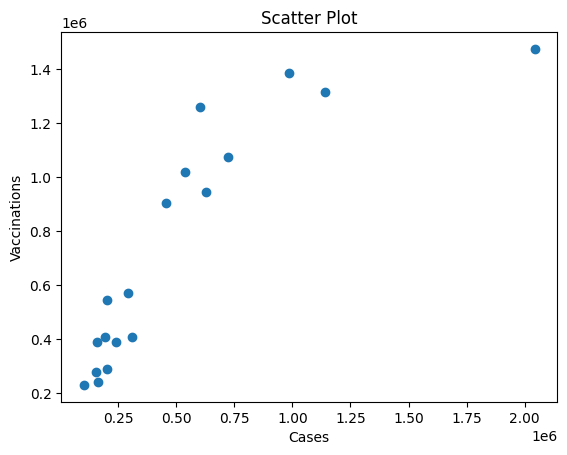

In [417]:
cypher_query = """
MATCH (n)
WITH n, substring(n.bezirkId, 0, 1) AS bundeslandId
WHERE NOT(n.BundeslandID CONTAINS '10') OR NOT(bundeslandId CONTAINS '10')
RETURN n.datum AS Year, COALESCE(bundeslandId, '') + COALESCE(n.BundeslandID, '') AS BundeslandID, max(n.fällePositiv) AS tests, sum(n.ersteImpfung) AS Vaccinations
ORDER BY Year, BundeslandID
"""

with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Create scatter plot
plt.scatter(df['tests'], df['Vaccinations'])

# Add labels and title
plt.xlabel('Cases')
plt.ylabel('Vaccinations')
plt.title('Scatter Plot')

# Show plot
plt.show()

Das Scatterplot stellt den Zusammenhang zwischen positiven Fällen und Impfraten dar. Das Scatterplot zeigt zwar eine Korrelation, aber keine Kausalität zwischen den Werten. Dies könnte darauf hindeuten, dass in Gebieten mit umfangreichen Testaktivitäten eine höhere öffentliche Gesundheitsreaktion stattfindet, einschließlich verstärkter Impfbemühungen.

Um abzufragen, wie viele Nodes in Der Tabelle sind, kann diese Query verwendet werden:

In [418]:
with driver.session() as session:
    result = session.run("MATCH (n) RETURN count(n) AS node_count")
    for record in result:
        print(record["node_count"])

12947


Im nächsten Abschnitt werden MapReduce-Calculations durchgeführt. Sie geben einen guten abschließenden, allgemeinen Überblick über die Impfdaten. Anschließend werden sie nochmals in einer Grafik dargestellt: 

### MapReduce-Calculations

### Anzahl der verabreichten Impfdosen bis 2021:

In [419]:
csv_filename = 'impfungen_2021.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2021 = []       # Liste

# CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['Gemeindecode'][0])  # Erste Stelle der Zahl bekommen
        teilgeimpfte = int(row['Teilgeimpfte'])
        vollimmunisierte = int(row['Vollimmunisierte'])
        data_2021.append((bundesland_names[bundesland_id], teilgeimpfte + vollimmunisierte))

    # Demonstrationszwecke

print("Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:")
print()

for item in data_2021[:5]:
    print(item)

print()


# Shuffle und Reduce
result_2021 = {}               # Dictionary

for bundesland_name, summe in data_2021:
    if bundesland_name in result_2021:
        result_2021[bundesland_name] += summe
    else:
        result_2021[bundesland_name] = summe

# Finaler Output
print("Dictionary nach Shuffle und Reduce:")
print()

for bundesland_name, summe in result_2021.items():
    print(f'{bundesland_name} {summe}')

print()
print("Als Pandas Dataframe:")
print()
df = pd.DataFrame(list(result_2021.items()), columns=['Bundesland:', 'Summe:'])
print(df)

# Data saven
data_2021_save = result_2021.copy()


Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:

('Burgenland', 22627)
('Burgenland', 3104)
('Burgenland', 2950)
('Burgenland', 2929)
('Burgenland', 3263)

Dictionary nach Shuffle und Reduce:

Burgenland 448008
Kärnten 752125
Niederösterreich 2433662
Oberösterreich 1963726
Salzburg 745793
Steiermark 1750087
Tirol 1045723
Vorarlberg 538266
Wien 2664676

Als Pandas Dataframe:

        Bundesland:   Summe:
0        Burgenland   448008
1           Kärnten   752125
2  Niederösterreich  2433662
3    Oberösterreich  1963726
4          Salzburg   745793
5        Steiermark  1750087
6             Tirol  1045723
7        Vorarlberg   538266
8              Wien  2664676


### Anzahl der verabreichten Impfdosen bis 2022:

In [420]:
csv_filename = 'impfungen_2022.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2022 = []      # Liste

# CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['municipality_id'][0])  # Erste Stelle der Zahl bekommen
        dose1 = int(row['dose_1'])
        dose2 = int(row['dose_2'])
        dose3 = int(row['dose_3'])
        dose4 = int(row['dose_4'])
        dose5 = int(row['dose_5+'])
        data_2022.append((bundesland_names[bundesland_id], dose1 + dose2 + dose3 + dose4 + dose5))


    # Demonstrationszwecke

print("Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:")
print()

for item in data_2022[:5]:
    print(item)

print()


# Shuffle und Reduce
result_2022 = {}      # Dictionary

for bundesland_name, summe in data_2022:
    if bundesland_name in result_2022:
        result_2022[bundesland_name] += summe
    else:
        result_2022[bundesland_name] = summe

# Finaler Output
print("Dictionary nach Shuffle und Reduce:")
print()

for bundesland_name, summe in result_2022.items():
    print(f'{bundesland_name} {summe}')

print()
print("Als Pandas Dataframe:")
print()
df = pd.DataFrame(list(result_2022.items()), columns=['Bundesland:', 'Summe:'])
print(df)

# Data saven
data_2022_save = result_2022.copy()


Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:

('Burgenland', 36260)
('Burgenland', 4887)
('Burgenland', 4792)
('Burgenland', 4664)
('Burgenland', 5204)

Dictionary nach Shuffle und Reduce:

Burgenland 708464
Kärnten 1151697
Niederösterreich 3812335
Oberösterreich 3036727
Salzburg 1141794
Steiermark 2751934
Tirol 1592136
Vorarlberg 816979
Wien 4169957

Als Pandas Dataframe:

        Bundesland:   Summe:
0        Burgenland   708464
1           Kärnten  1151697
2  Niederösterreich  3812335
3    Oberösterreich  3036727
4          Salzburg  1141794
5        Steiermark  2751934
6             Tirol  1592136
7        Vorarlberg   816979
8              Wien  4169957


### Anzahl der verabreichten Impfdosen bis 2023:

In [421]:
csv_filename = 'impfungen_2023.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2023 = []                 # Liste

    # CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['municipality_id'][0])  # Erste Stelle der Zahl bekommen
        dose1 = int(row['vaccination_1'])
        dose2 = int(row['vaccination_2'])
        dose3 = int(row['vaccination_3'])
        dose4 = int(row['vaccination_4+'])
        
        data_2023.append((bundesland_names[bundesland_id], dose1 + dose2 + dose3 + dose4))


    # Demonstrationszwecke

print("Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:")
print()

for item in data_2023[:5]:
    print(item)

print()



# Shuffle und Reduce
result_2023 = {}       # Dictionary

for bundesland_name, summe in data_2023:
    if bundesland_name in result_2023:
        result_2023[bundesland_name] += summe
    else:
        result_2023[bundesland_name] = summe

# Finaler Output
print("Dictionary nach Shuffle und Reduce:")
print()

for bundesland_name, summe in result_2023.items():
    print(f'{bundesland_name} {summe}')

print()
print("Als Pandas Dataframe:")
print()
df = pd.DataFrame(list(result_2023.items()), columns=['Bundesland:', 'Summe:'])
print(df)

# Data saven
data_2023_save = result_2023.copy()


Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:

('Burgenland', 37325)
('Burgenland', 4996)
('Burgenland', 4864)
('Burgenland', 4814)
('Burgenland', 5294)

Dictionary nach Shuffle und Reduce:

Burgenland 725126
Kärnten 1170762
Niederösterreich 3896740
Oberösterreich 3067711
Salzburg 1148982
Steiermark 2786608
Tirol 1606019
Vorarlberg 822758
Wien 4237924

Als Pandas Dataframe:

        Bundesland:   Summe:
0        Burgenland   725126
1           Kärnten  1170762
2  Niederösterreich  3896740
3    Oberösterreich  3067711
4          Salzburg  1148982
5        Steiermark  2786608
6             Tirol  1606019
7        Vorarlberg   822758
8              Wien  4237924


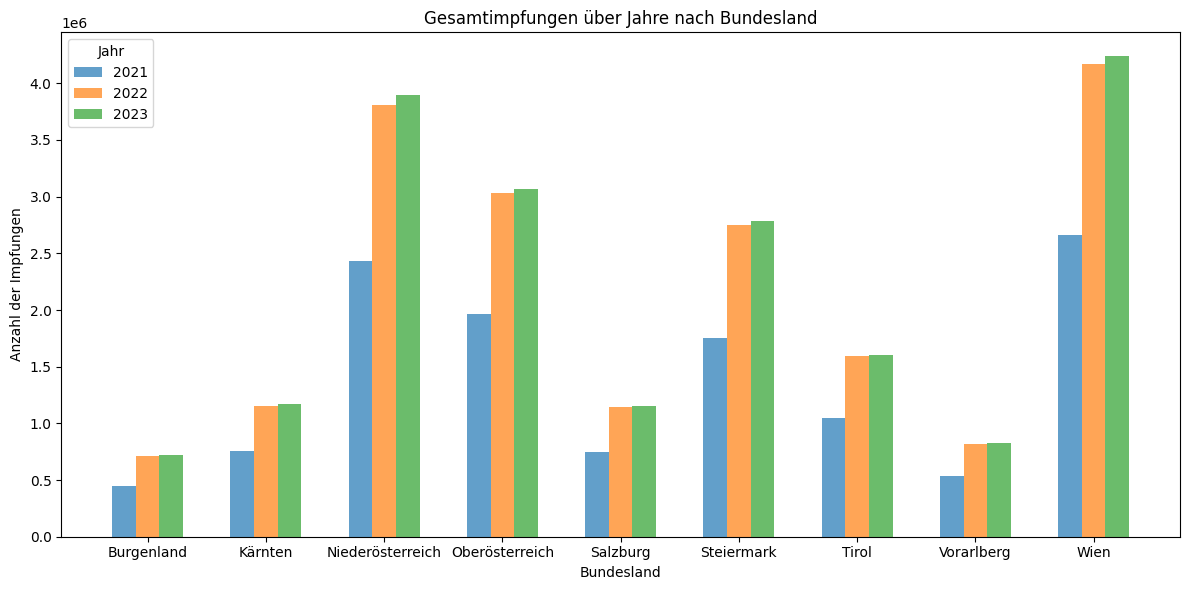

In [422]:
combined_data = {}

for bundesland_name in bundesland_names.values():
    combined_data[bundesland_name] = {
        '2021': data_2021_save.get(bundesland_name, 0),
        '2022': data_2022_save.get(bundesland_name, 0),
        '2023': data_2023_save.get(bundesland_name, 0)
    }

plt.figure(figsize=(12, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bar_width = 0.2

for j, year in enumerate(['2021', '2022', '2023']):
    x_values = []
    y_values = []
    for i, (bundesland, year_data) in enumerate(combined_data.items()):
        x_values.append(i + j * bar_width)
        y_values.append(year_data.get(year, 0))

    plt.bar(x_values, y_values, width=bar_width, color=colors[j], alpha=0.7, label=year)  # Add label for the legend

plt.title('Gesamtimpfungen über Jahre nach Bundesland')
plt.xlabel('Bundesland')
plt.ylabel('Anzahl der Impfungen')

# Legende hinzufügen
plt.legend(title='Jahr')

# Zentrale Position der x-Ticks berechnen anhand der Anzahl der Bars
num_bars = len(['2021', '2022', '2023'])
plt.xticks(np.arange(len(combined_data)) + bar_width * (num_bars - 1) / 2, combined_data.keys())

plt.tight_layout()
plt.show()


Mithilfe der MapReduce-Calculations konnten die gleichen Ergebnisse wie weiter oben ersichtich erziehlt werden.

# Fazit

Die COVID-19-Pandemie löste weltweit eine Gesundheitskrise aus, die sich auch in Österreich stark bemerkbar gemacht hat. Nach ihrem Ausbruch anfang des Jahres 2020 hat die Pandemie das tägliche Leben der Menschen in Österreich stark verändert und es dauerte nicht lang, bis über die Notwendigkeit von Impfungen diskutuert wurde. Deshalb werden hier die wichtigsten Ergebnisse dieser Analyse zusammengefasst:

Die Jahre 2021 und 2022 waren geprägt von einem signifikanten Anstieg der verabreichten Impfdosen, was auf eine Bemühung zur Eindämmung der Pandemie hinweist. In Wien wurden die meisten Menschen geimpft, gefolgt von Niederösterreich. Burgenland hingegen verzeichnete die wenigsten verabreichten Impfdosen. Interessanterweise war Burgenland aber das Bundesland mit den höchsten Impfraten pro Einwohner, gefolgt von Niederösterreich, während Oberösterreich die wenigsten Impfungen pro Einwohner vergab.

In Bezug auf die Infektionsfälle zeigte sich ein ähnliches Muster: Wien verzeichnete die höchste Anzahl von positiven Fällen, gefolgt von Niederösterreich. Burgenland was das Bundesland mit den wenigsten positiven Fällen. Bei der Betrachtung der Infektionsfälle pro Einwohner, ragt Wien erneut heraus, gefolgt von Salzburg und Vorarlberg, während Tirol die geringste Infektionsrate aufwies.

Ein bemerkenswerter Trend war der leichte Anstieg der geimpften Personen von 2021 auf 2022, gefolgt von einem Rückgang im Jahr 2023, der hochstwahrscheinlich auf Todesfälle zurückzuführen ist.

Auch wenn mit den genutzten Daten kein direkter, kausaler Zusammenhang zwischen den Impfungen und den Infektionsfällen festgestellt werden konnte, verdeutlicht dieses Projekt dennoch die regionalen Unterschieden in Bezug auf Impfungen und Infektionsraten. 


#  Aufräumen:

Es werden alle container angezeigt

In [423]:
!docker ps

CONTAINER ID   IMAGE     COMMAND                  CREATED              STATUS              PORTS                                                      NAMES
b8114e941660   neo4j     "tini -g -- /startup…"   About a minute ago   Up About a minute   0.0.0.0:7474->7474/tcp, 7473/tcp, 0.0.0.0:7687->7687/tcp   neo4j-container
2e134ea7670a   mysql     "docker-entrypoint.s…"   6 weeks ago          Up 6 hours          0.0.0.0:3306->3306/tcp, 33060/tcp                          mysql-docker-db-1


Danach wird der Container wieder geschlossen:

In [424]:
!docker-compose -p project_neo4j down

 Container neo4j-container  Stopping
 Container neo4j-container  Stopped
 Container neo4j-container  Removing
 Container neo4j-container  Removed
 Network project_neo4j_default  Removing
 Network project_neo4j_default  Removed


In [425]:
!docker volume ls

DRIVER    VOLUME NAME
local     0e9da5256ba3fa77a45c395af88cce6b528078b373cfda01b1e28eec09630d0e
local     4ba8b12bf62b35c799a09bfd2fc9f84599b28427a53add5e9683ded55a281b2d
local     7ee6441fb1371dddd14aacc59db60af04a09ecbbfca710a28224a7a8f0b04a64
local     8d11d88d406139a2fe4cdc2ff5e4baa513b5fb52336591f660f0592dd7d74b57
local     9de6c733fbc30b88cbd78310341382584b537c15277e48b557a498d764c40054
local     34d1db8ca6e7203518269281238bbafdedb74c3c0a72af8c2ca6c43ef24f656b
local     38e0b61429f2b0c0771d9952d16026fdbdc6a86da4691000671273a23c007d0a
local     0499e464948518b701e69e48ae43af75d1264b097a8e420cff57d72a357332df
local     572f05a3926ab73192855d01eca0432fd8b4d9e30938b6f06385bb59279fc714
local     705c90af9bc7a3336feed9d4c1af2271b06655b040a6bce6247abb5d6c118fb2
local     0811acd03931c85b899fdcde049e4b183d3fc2fa04111e65f5cb3170c3e95d19
local     13385bac811f7bb0322ee8c11bb4ec446f3add99cb21cffb95b7e223c4f7fa7f
local     880221a39713bdaf503cdc39d768fdb9c8fd161db9d8f7a208b5ac50f956f0e5
loc

Um ein Volume zu löschen, kann man folgenden Befehl verwenden:

In [426]:
!docker volume rm project_neo4j_neo4j-data

project_neo4j_neo4j-data
